# Insurance EDA (Step‑by‑Step)

Reproducible analysis of **insurance.csv**. Tools: pandas, numpy, matplotlib (no seaborn).

## Load & Preview

In [1]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/mnt/data/insurance.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/insurance.csv'

## Missing, Duplicates, Descriptives

In [ ]:

missing = df.isna().sum().to_frame("missing_count")
missing["missing_pct"] = (missing["missing_count"] / len(df)).round(4)
dupes = df.duplicated().sum()
display(missing)
print("Duplicate rows:", dupes)
display(df.describe(include="all").transpose())


,missing_count,missing_pct
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


Duplicate rows: 1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Distributions

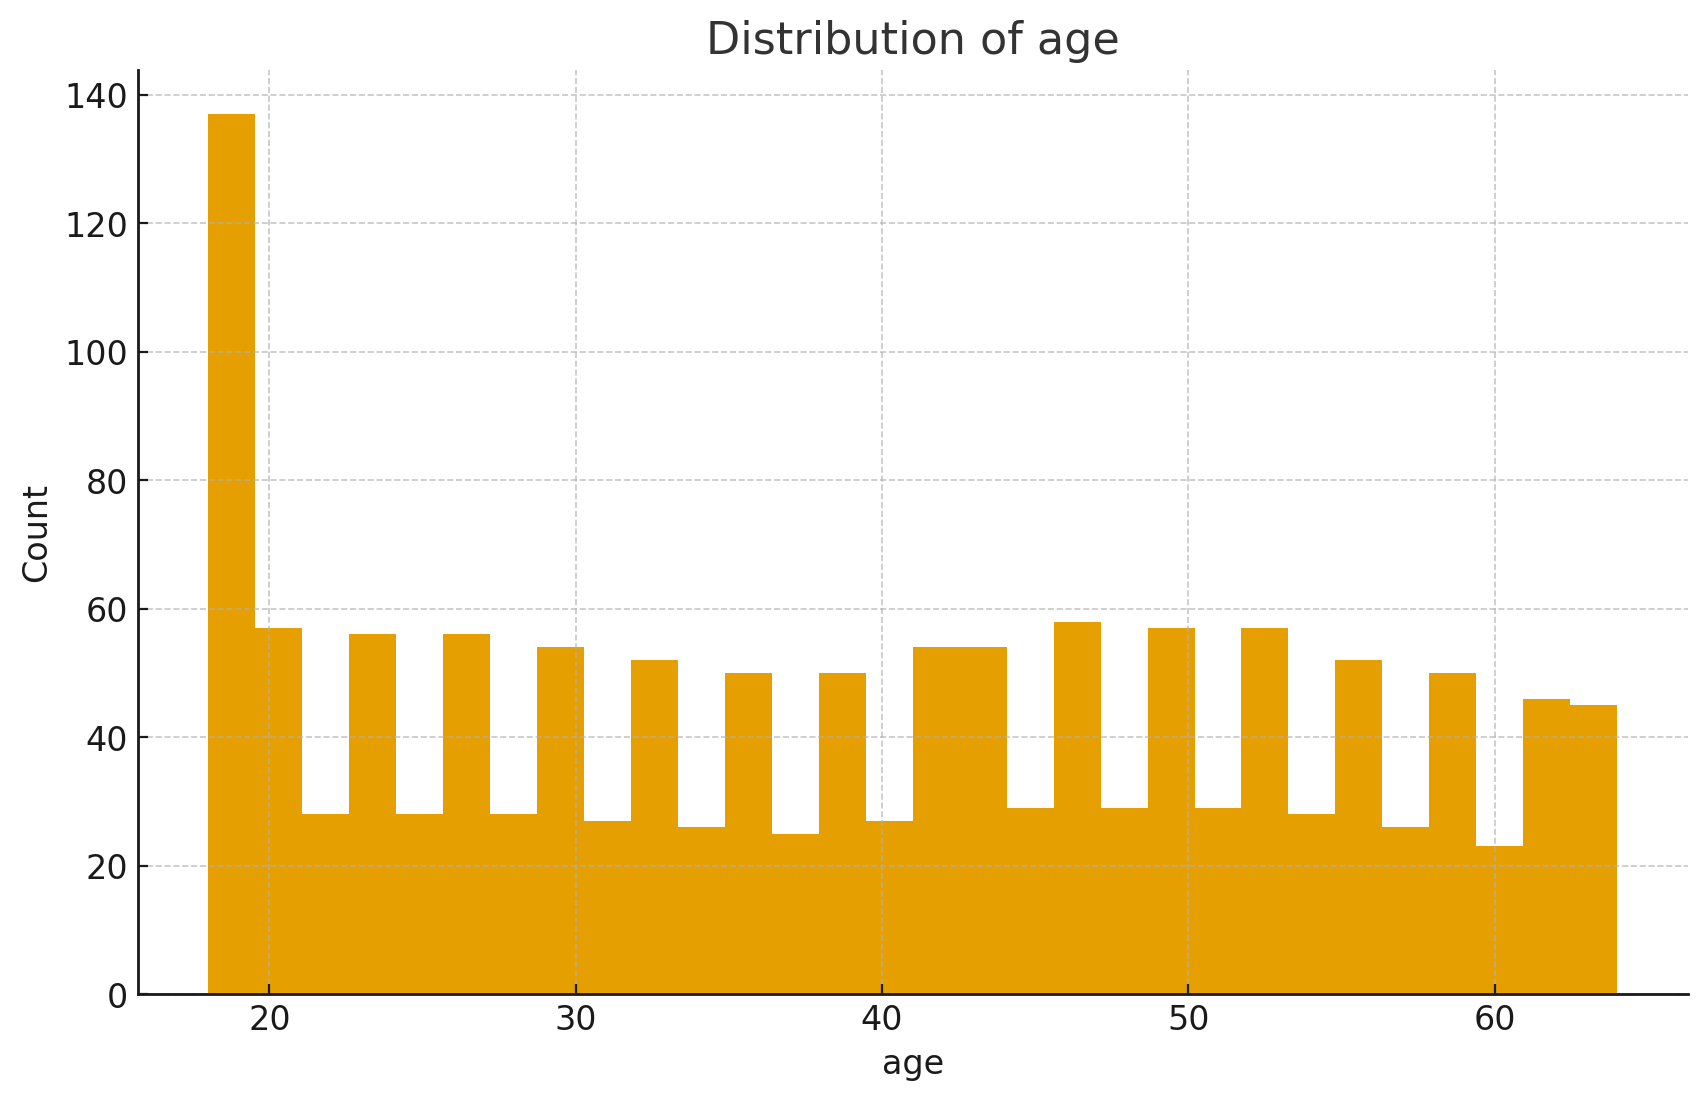

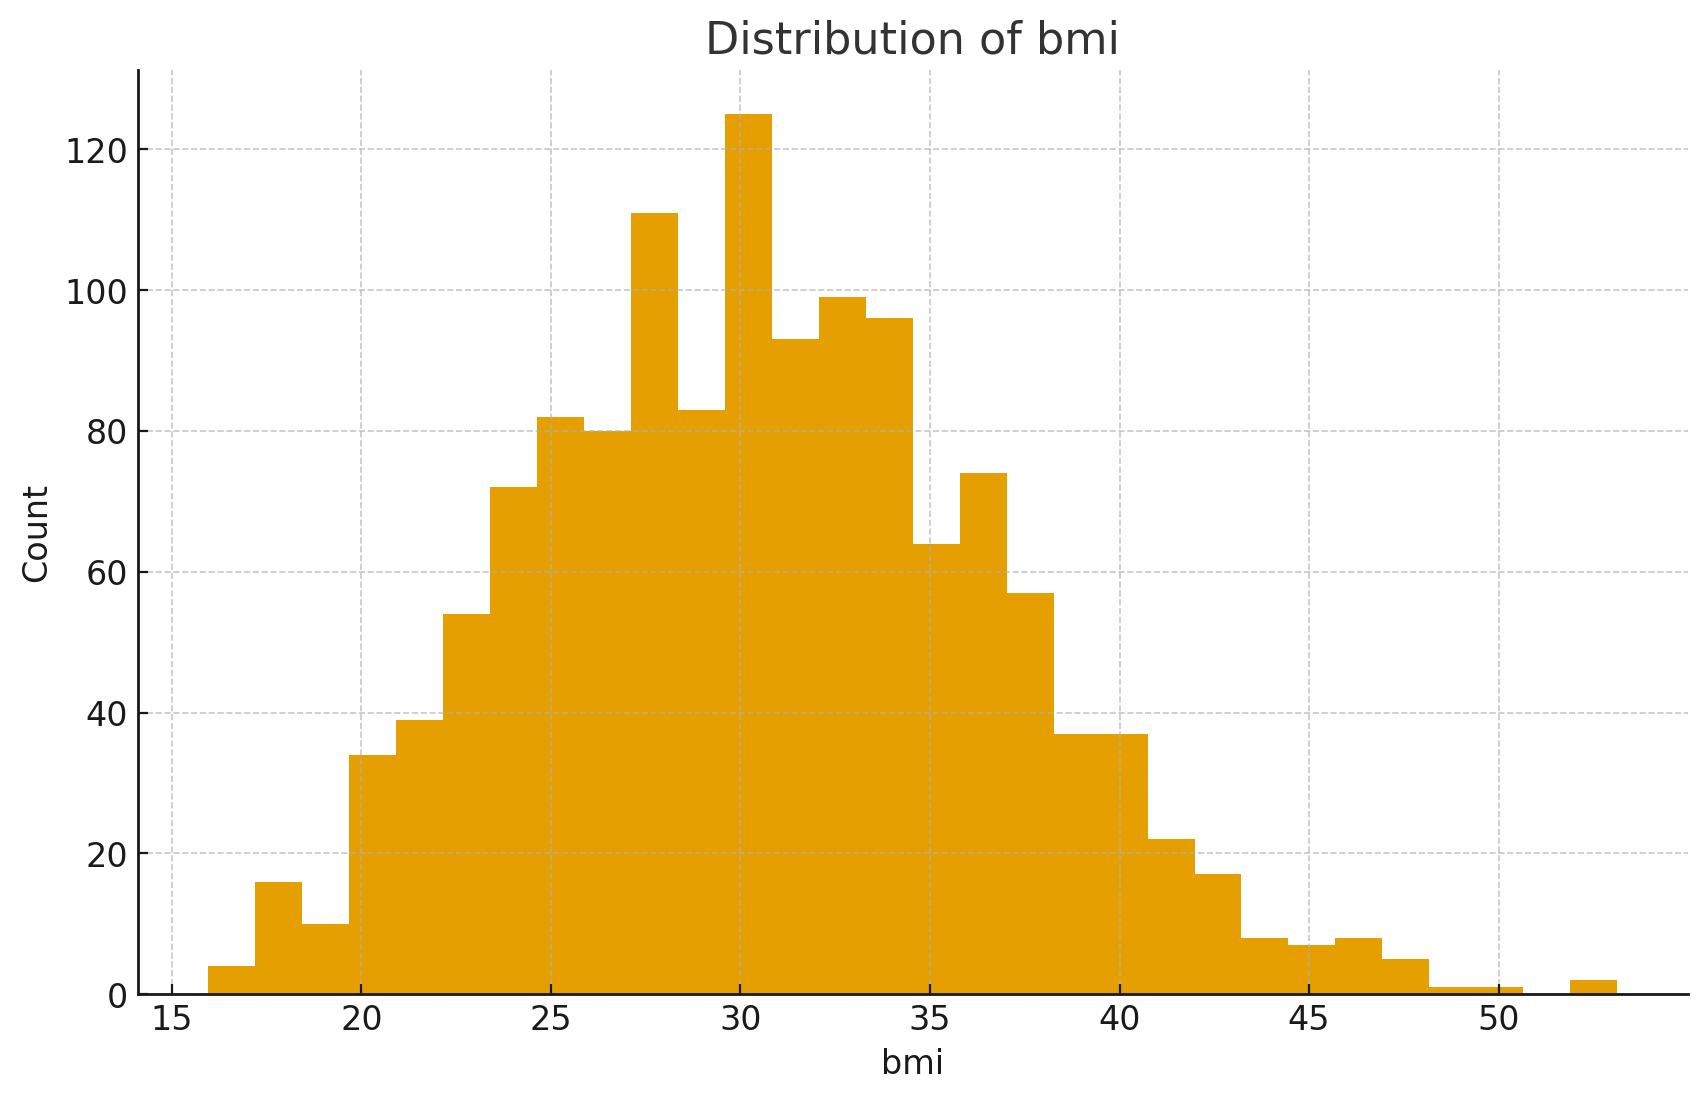

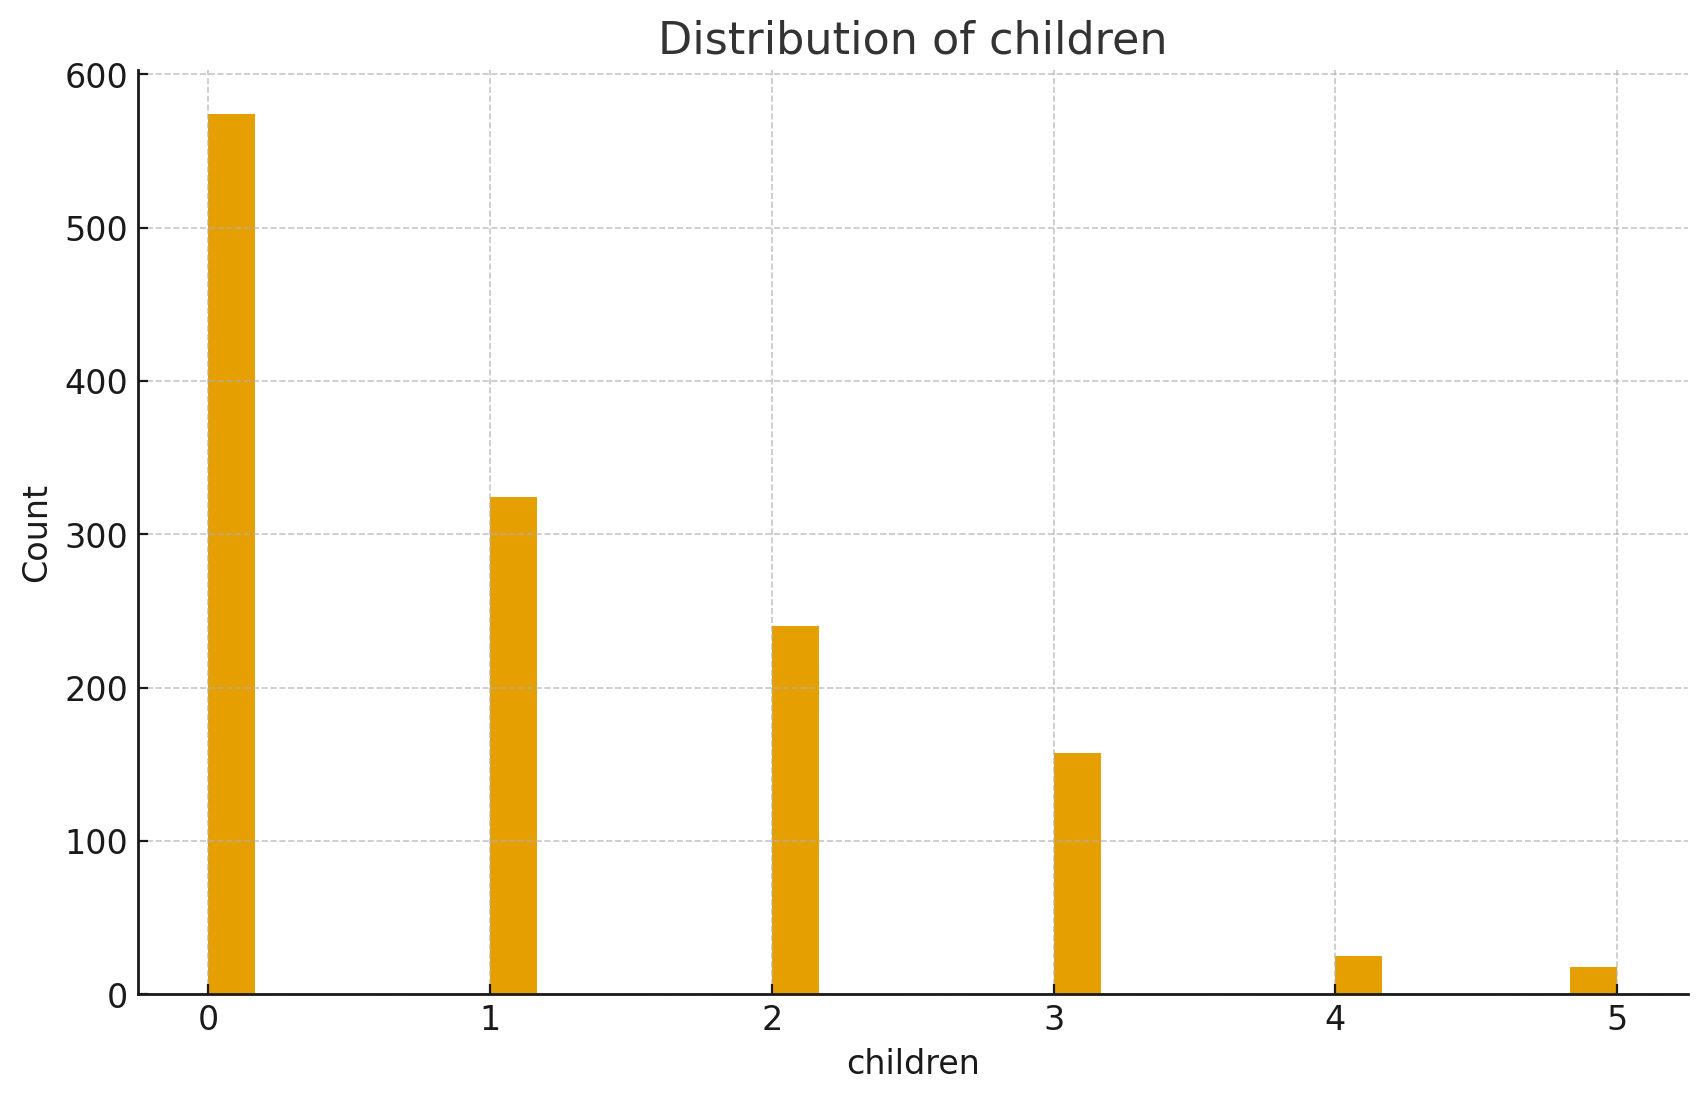

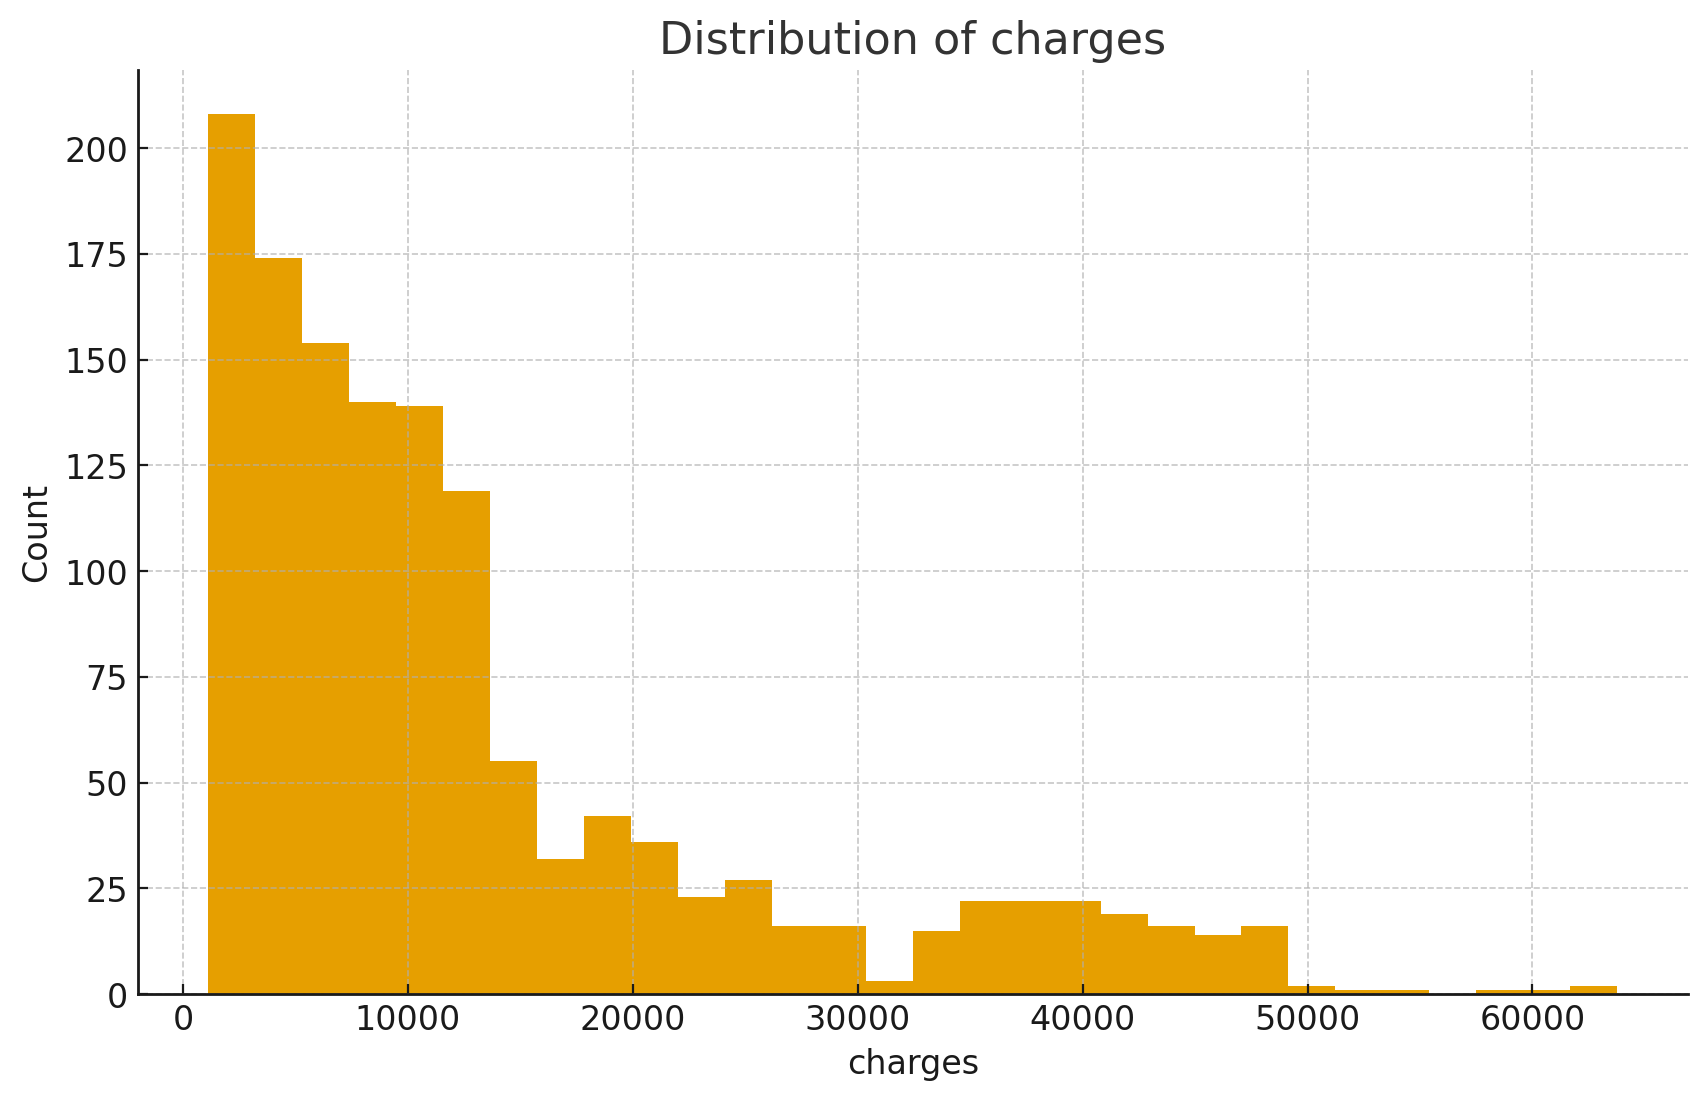

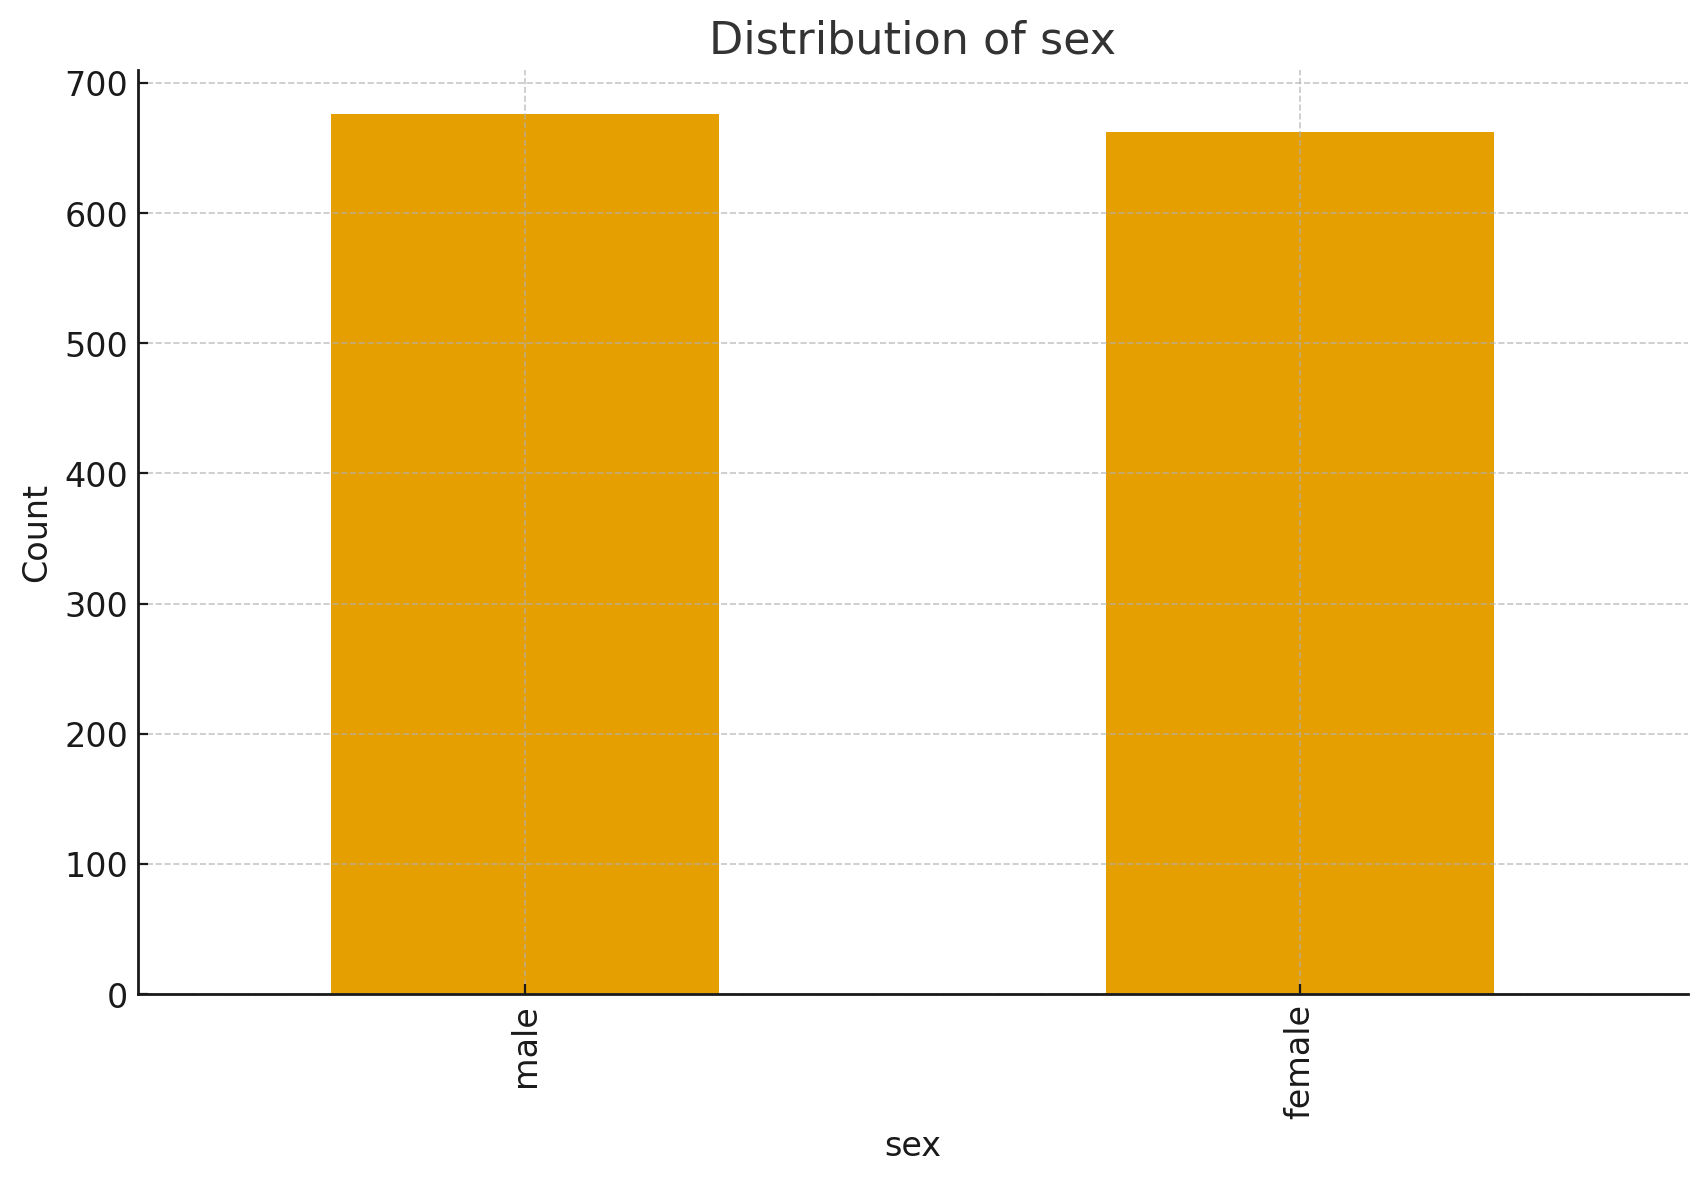

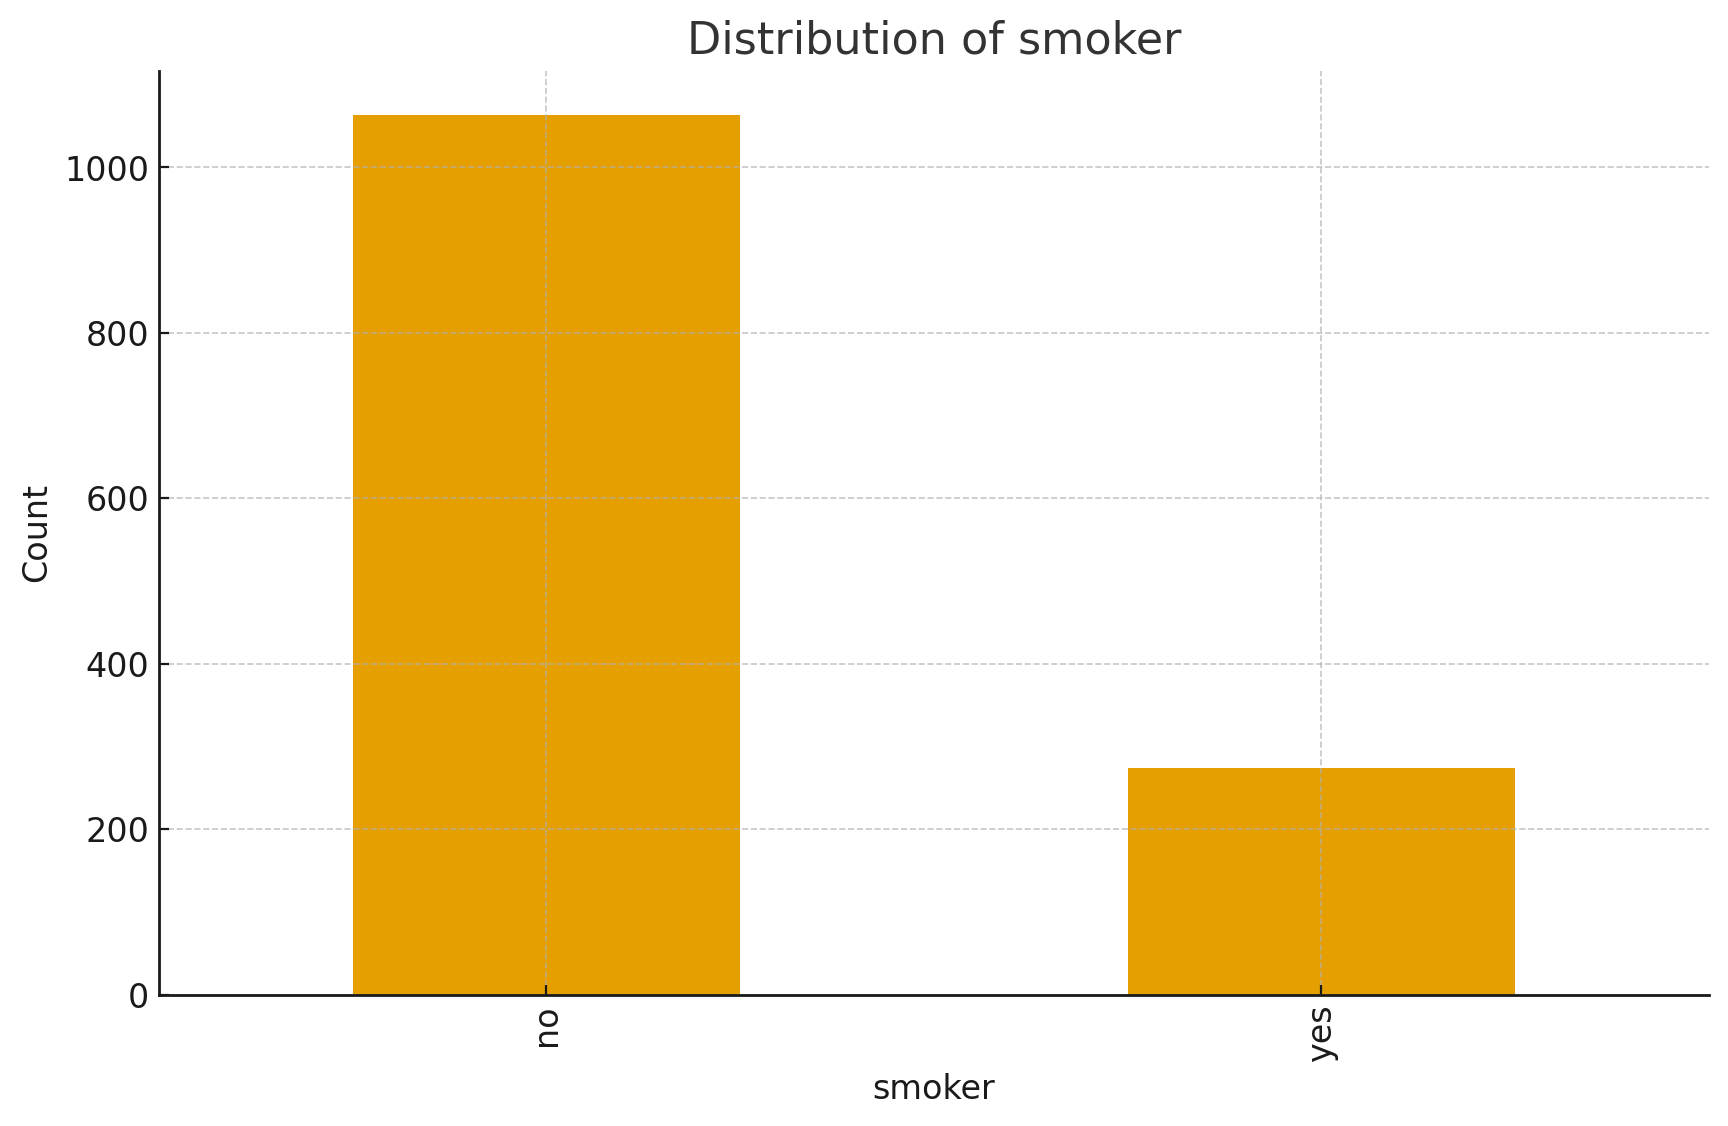

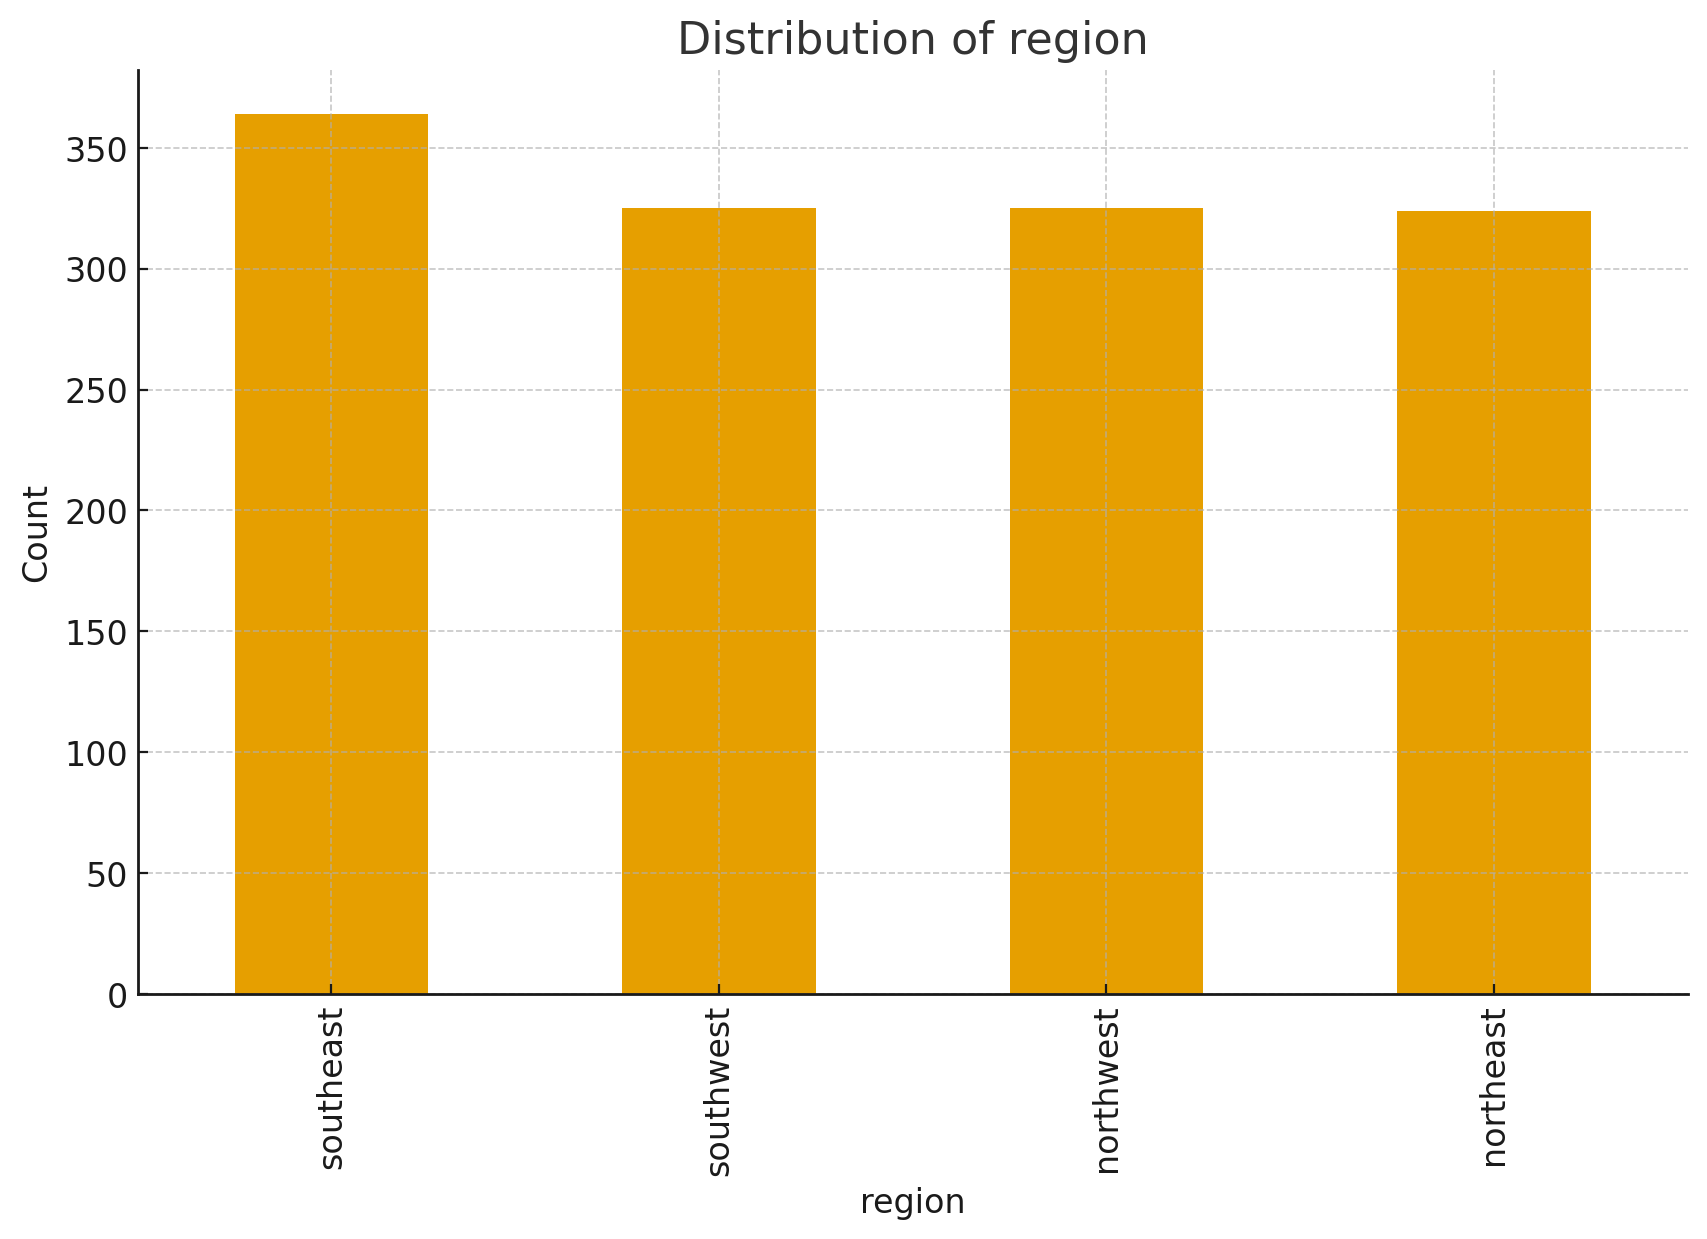

In [ ]:

for col in ["age","bmi","children","charges"]:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Count"); plt.show()

for col in ["sex","smoker","region"]:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Count"); plt.show()


## Outliers & Boxplots

bmi IQR bounds: 13.7 47.29
charges IQR bounds: -13109.15 34489.35


<Figure size 2000x1200 with 0 Axes>

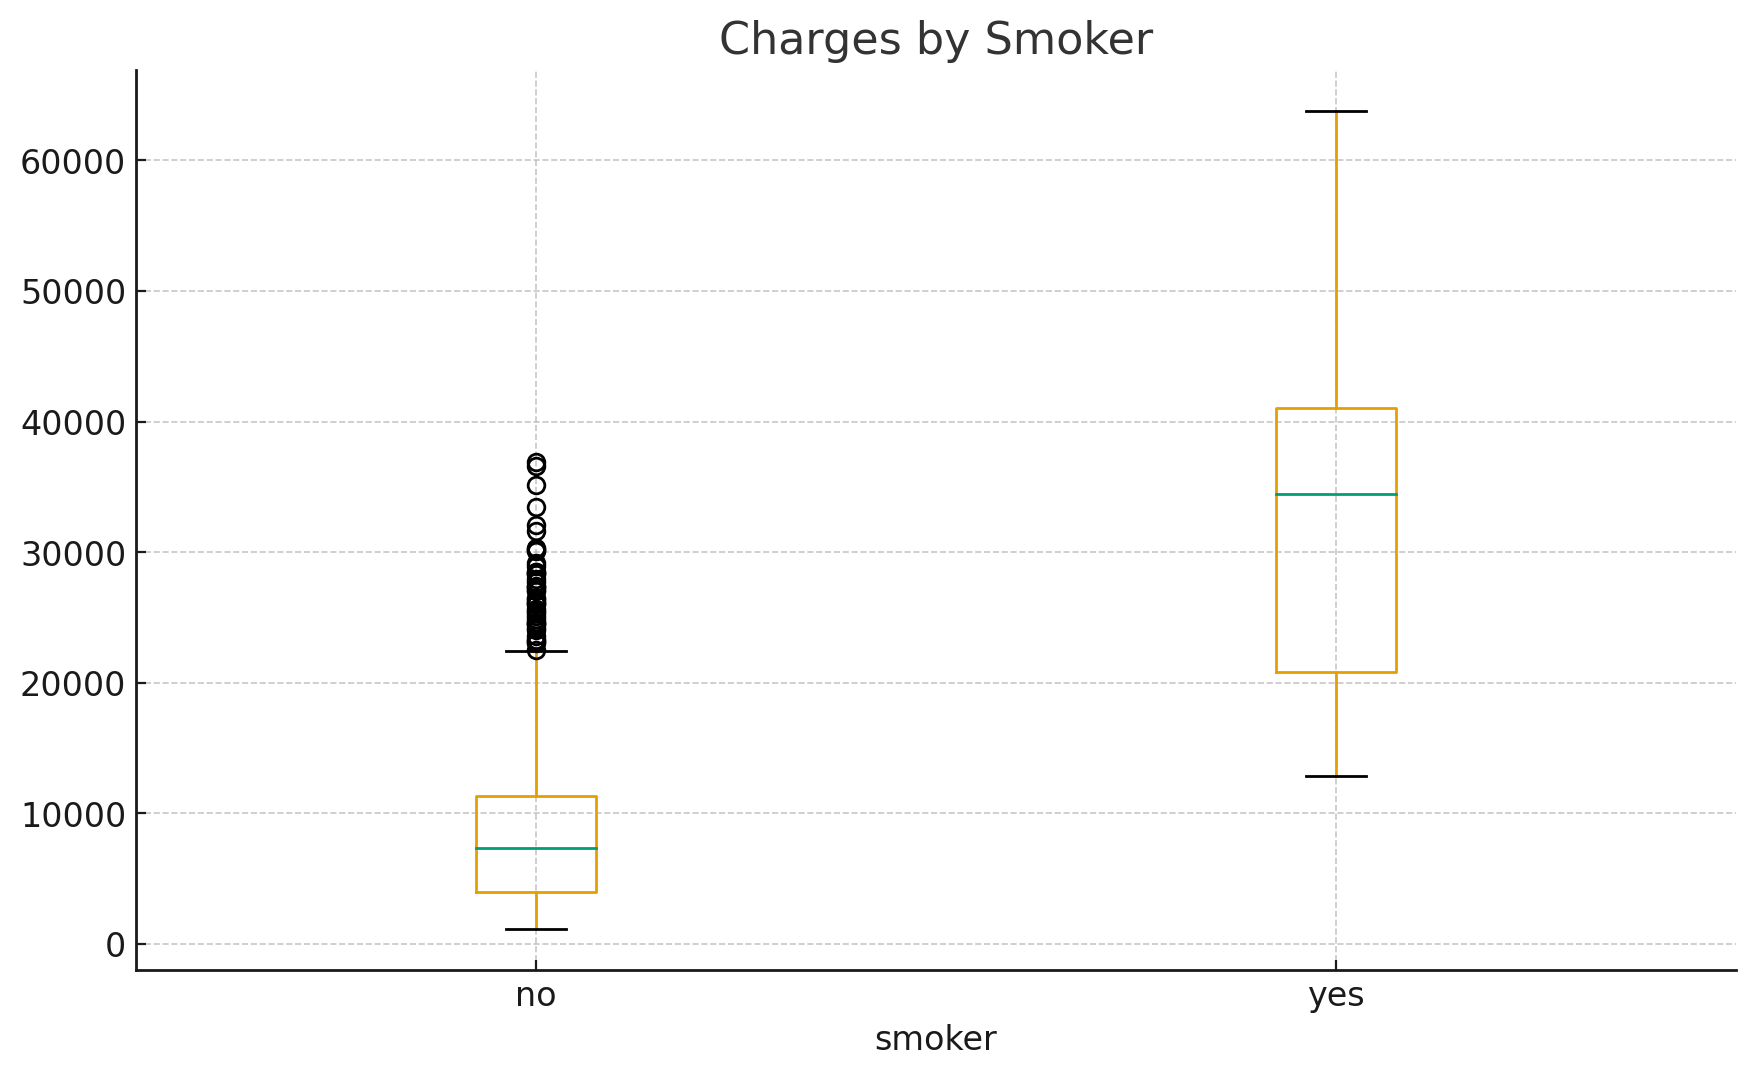

<Figure size 2000x1200 with 0 Axes>

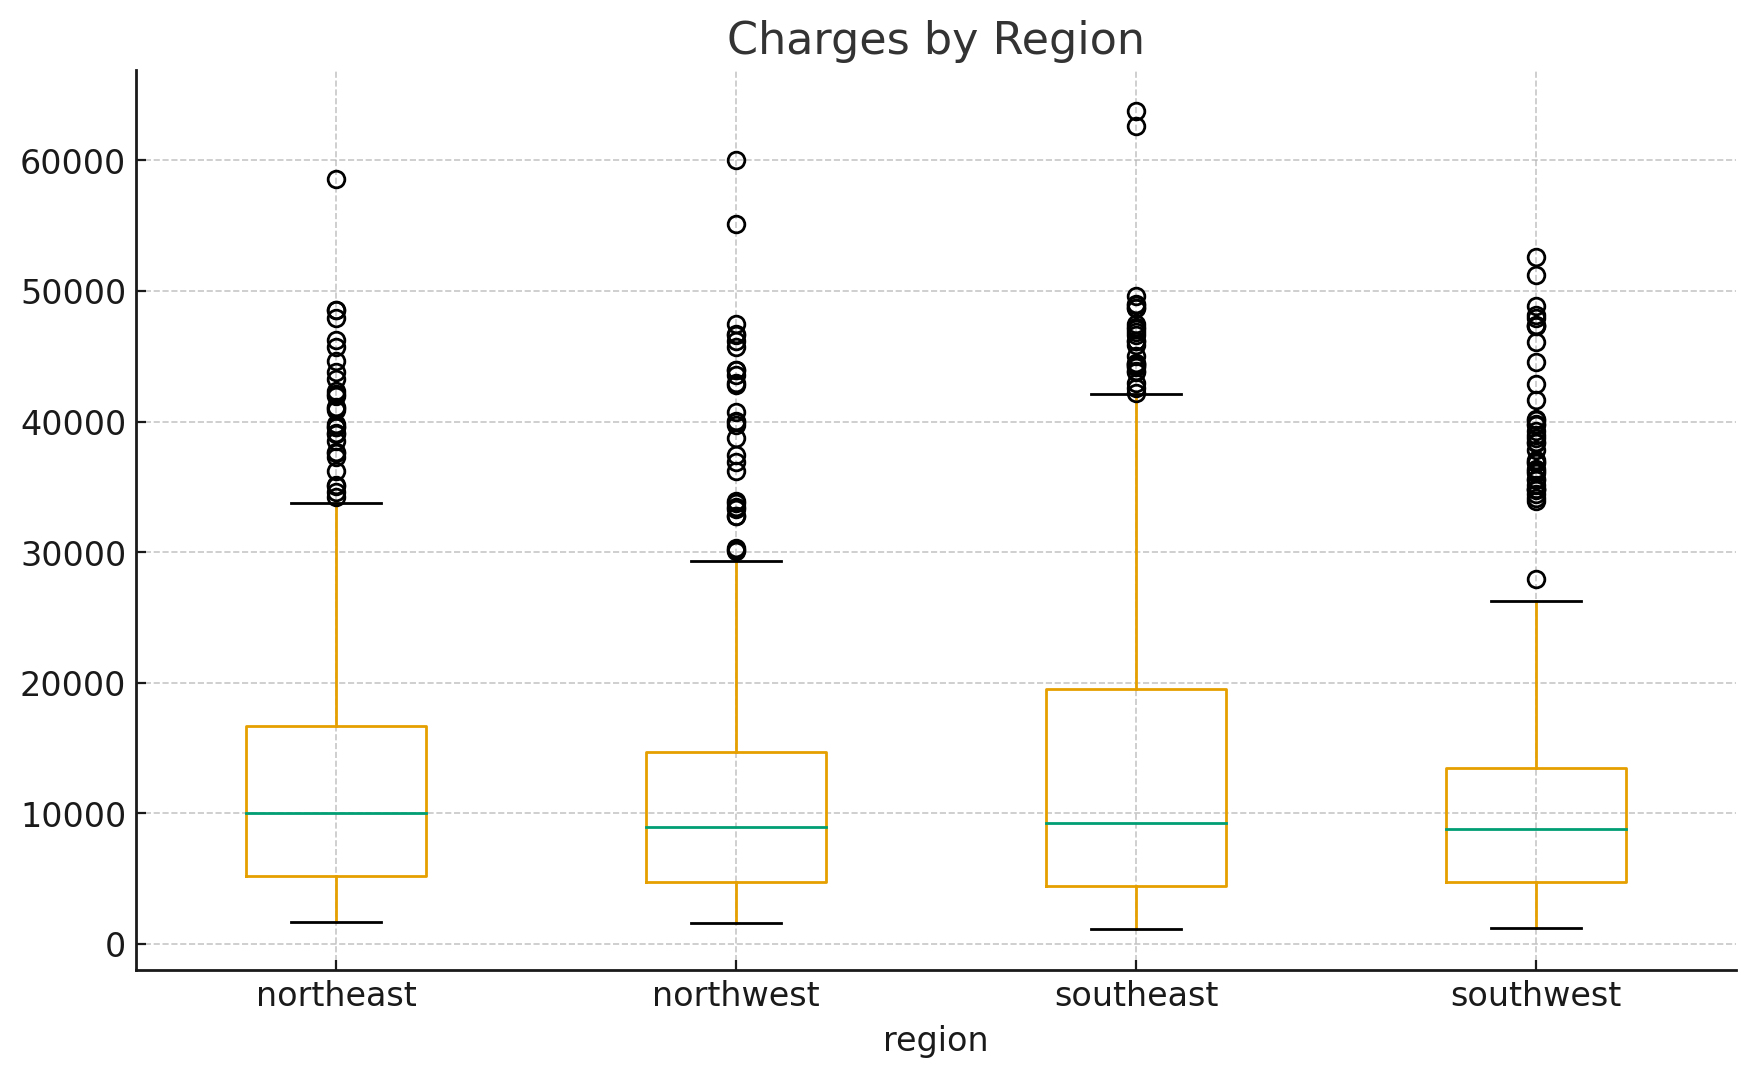

In [ ]:

import numpy as np
def iqr_bounds(s):
    q1,q3 = np.percentile(s,[25,75])
    iqr = q3-q1
    return q1-1.5*iqr, q3+1.5*iqr
for col in ["bmi","charges"]:
    low, high = iqr_bounds(df[col])
    print(col, "IQR bounds:", round(low,2), round(high,2))
plt.figure(); df.boxplot(column="charges", by="smoker"); plt.title("Charges by Smoker"); plt.suptitle(""); plt.show()
plt.figure(); df.boxplot(column="charges", by="region"); plt.title("Charges by Region"); plt.suptitle(""); plt.show()


## Correlations

,age,bmi,children,charges,smoker_flag
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_flag,-0.025019,0.003750,0.007673,0.787251,1.000000


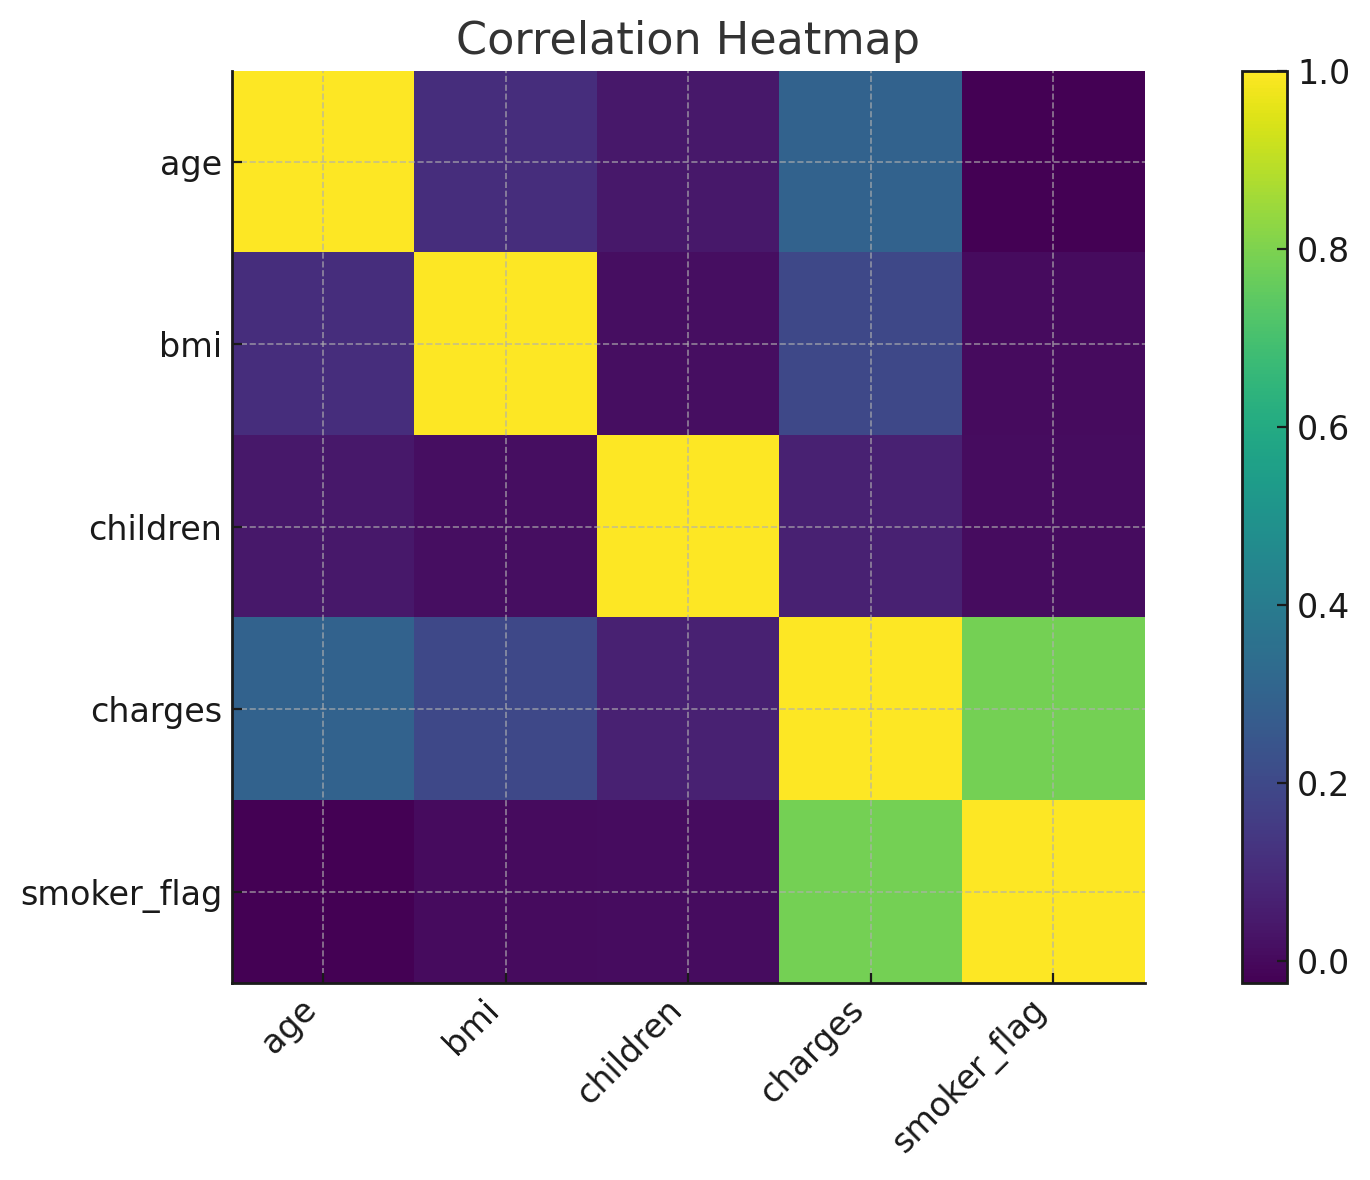

In [ ]:

df["smoker_flag"] = df["smoker"].map({"yes":1,"no":0})
corr = df[["age","bmi","children","charges","smoker_flag"]].corr()
display(corr)
plt.figure(); plt.imshow(corr, interpolation="nearest"); 
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right"); 
plt.yticks(range(len(corr.columns)), corr.columns);
plt.title("Correlation Heatmap"); plt.colorbar(); plt.tight_layout(); plt.show()


## Scatter + Trendlines

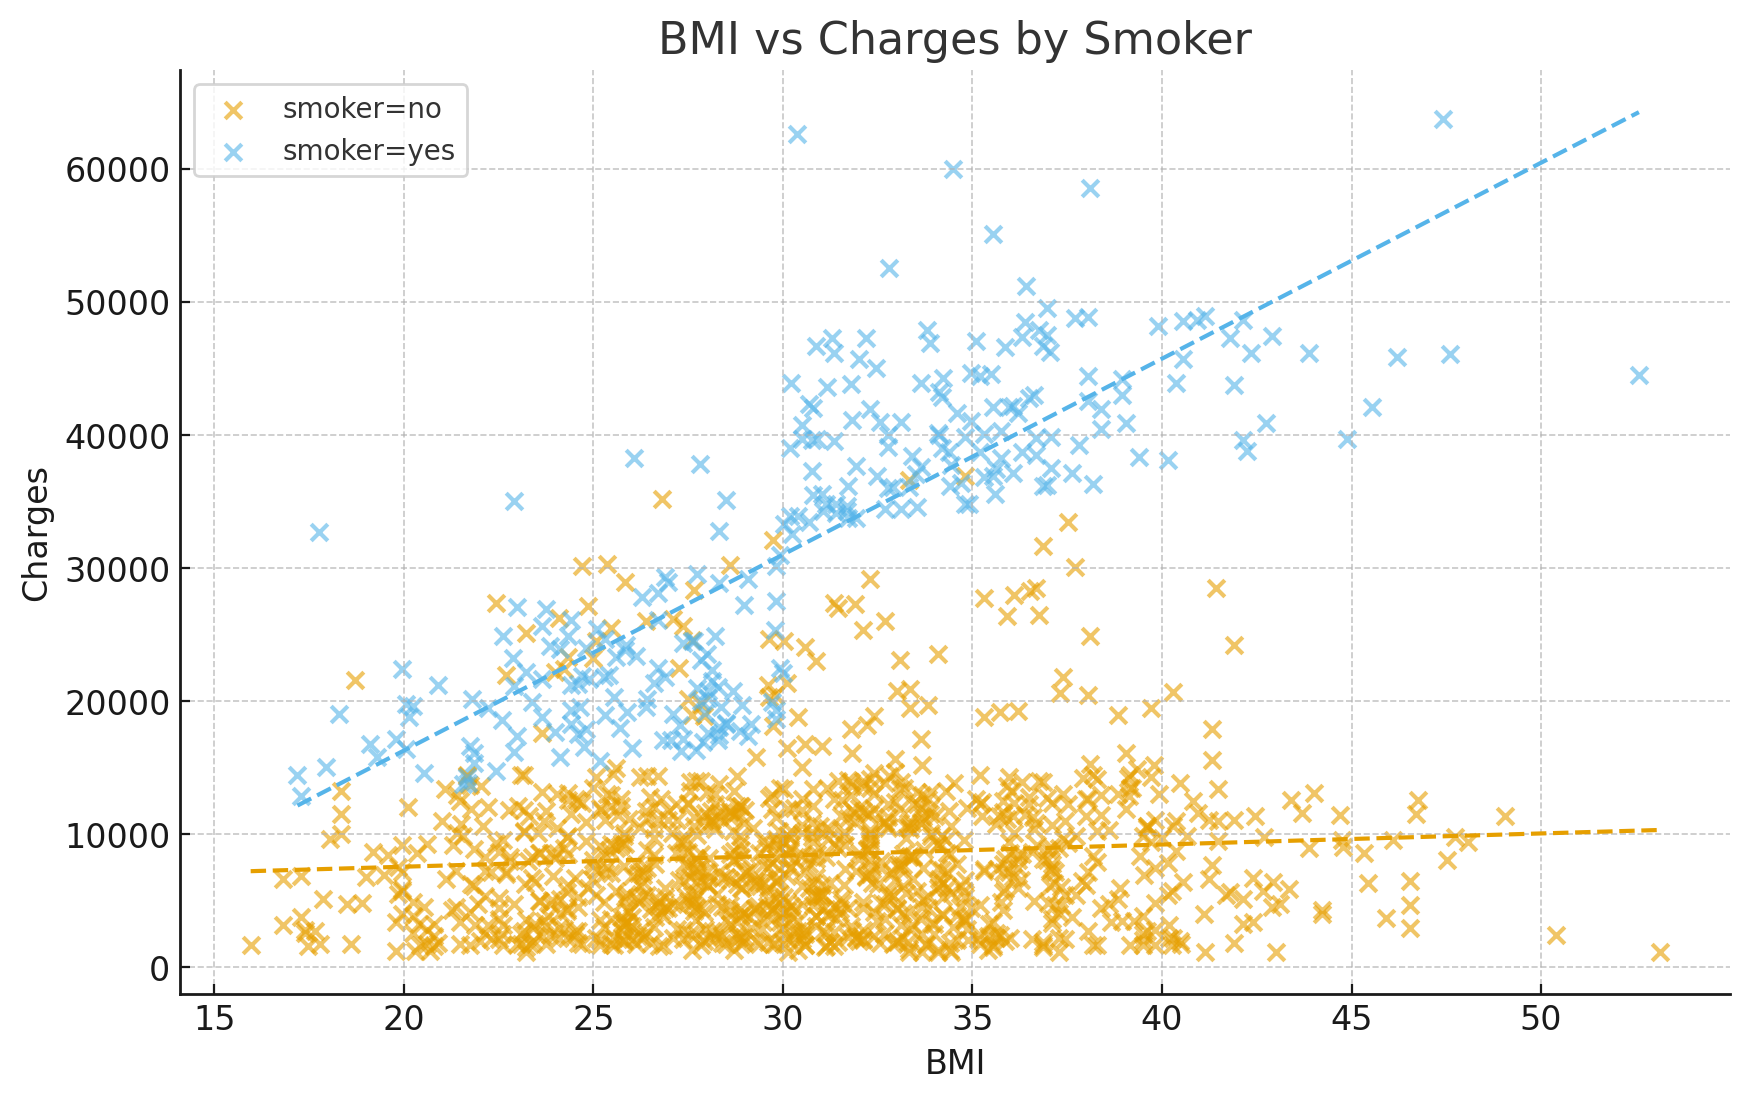

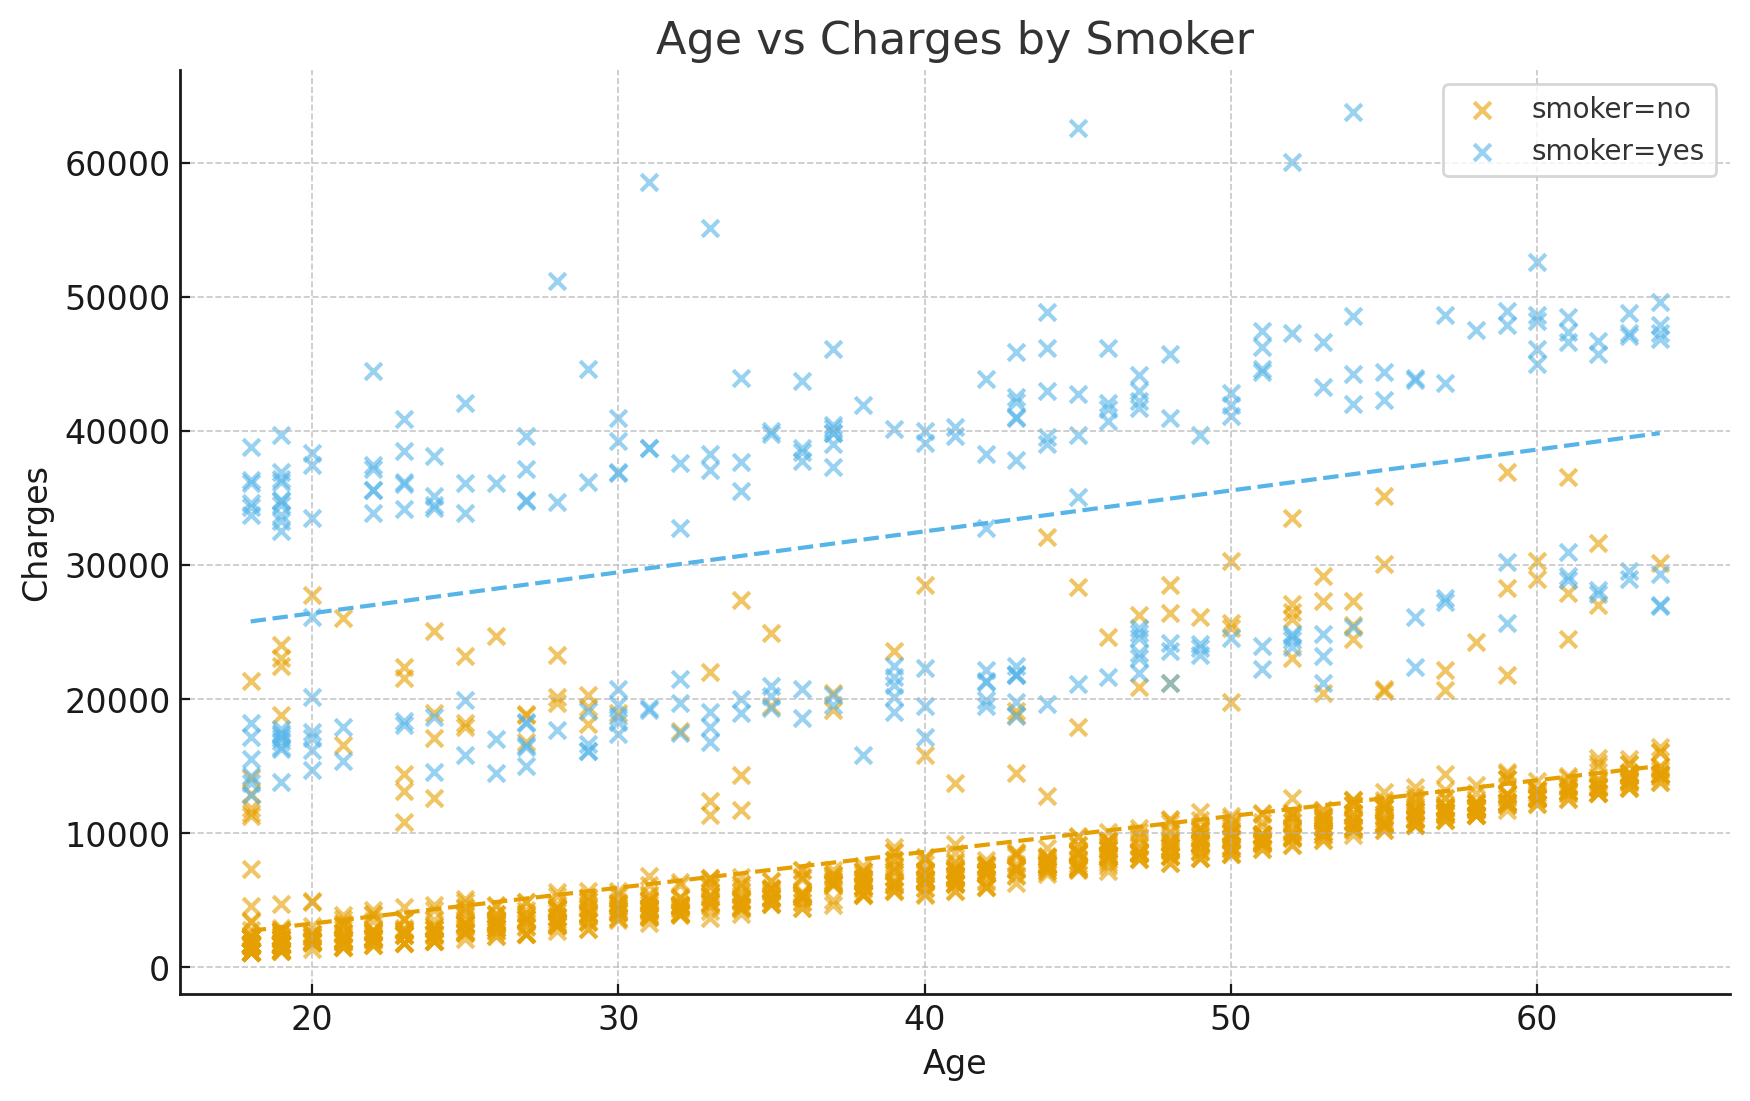

In [ ]:

import numpy as np
def scatter_trend(x,y,label):
    plt.scatter(x,y,alpha=0.6,label=label)
    if len(x)>1:
        a,b = np.polyfit(x,y,1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, a*xs+b, linestyle="--")
plt.figure()
for g,sub in df.groupby("smoker"):
    scatter_trend(sub["bmi"].values, sub["charges"].values, f"smoker={g}")
plt.xlabel("BMI"); plt.ylabel("Charges"); plt.title("BMI vs Charges by Smoker"); plt.legend(); plt.show()

plt.figure()
for g,sub in df.groupby("smoker"):
    scatter_trend(sub["age"].values, sub["charges"].values, f"smoker={g}")
plt.xlabel("Age"); plt.ylabel("Charges"); plt.title("Age vs Charges by Smoker"); plt.legend(); plt.show()


## Groups & Interactions

,count,mean,median,std
smoker,,,,
no,1064,8434.27,7345.41,5993.78
yes,274,32050.23,34456.35,11541.55


,count,mean,median,std
children,,,,
0,574,12365.98,9856.95,12023.29
1,324,12731.17,8483.87,11823.63
2,240,15073.56,9264.98,12891.37
3,157,15355.32,10600.55,12330.87
4,25,13850.66,11033.66,9139.22
5,18,8786.04,8589.57,3808.44


,count,mean,median,std
region,,,,
northeast,324,13406.38,10057.65,11255.80
northwest,325,12417.58,8965.80,11072.28
southeast,364,14735.41,9294.13,13971.10
southwest,325,12346.94,8798.59,11557.18


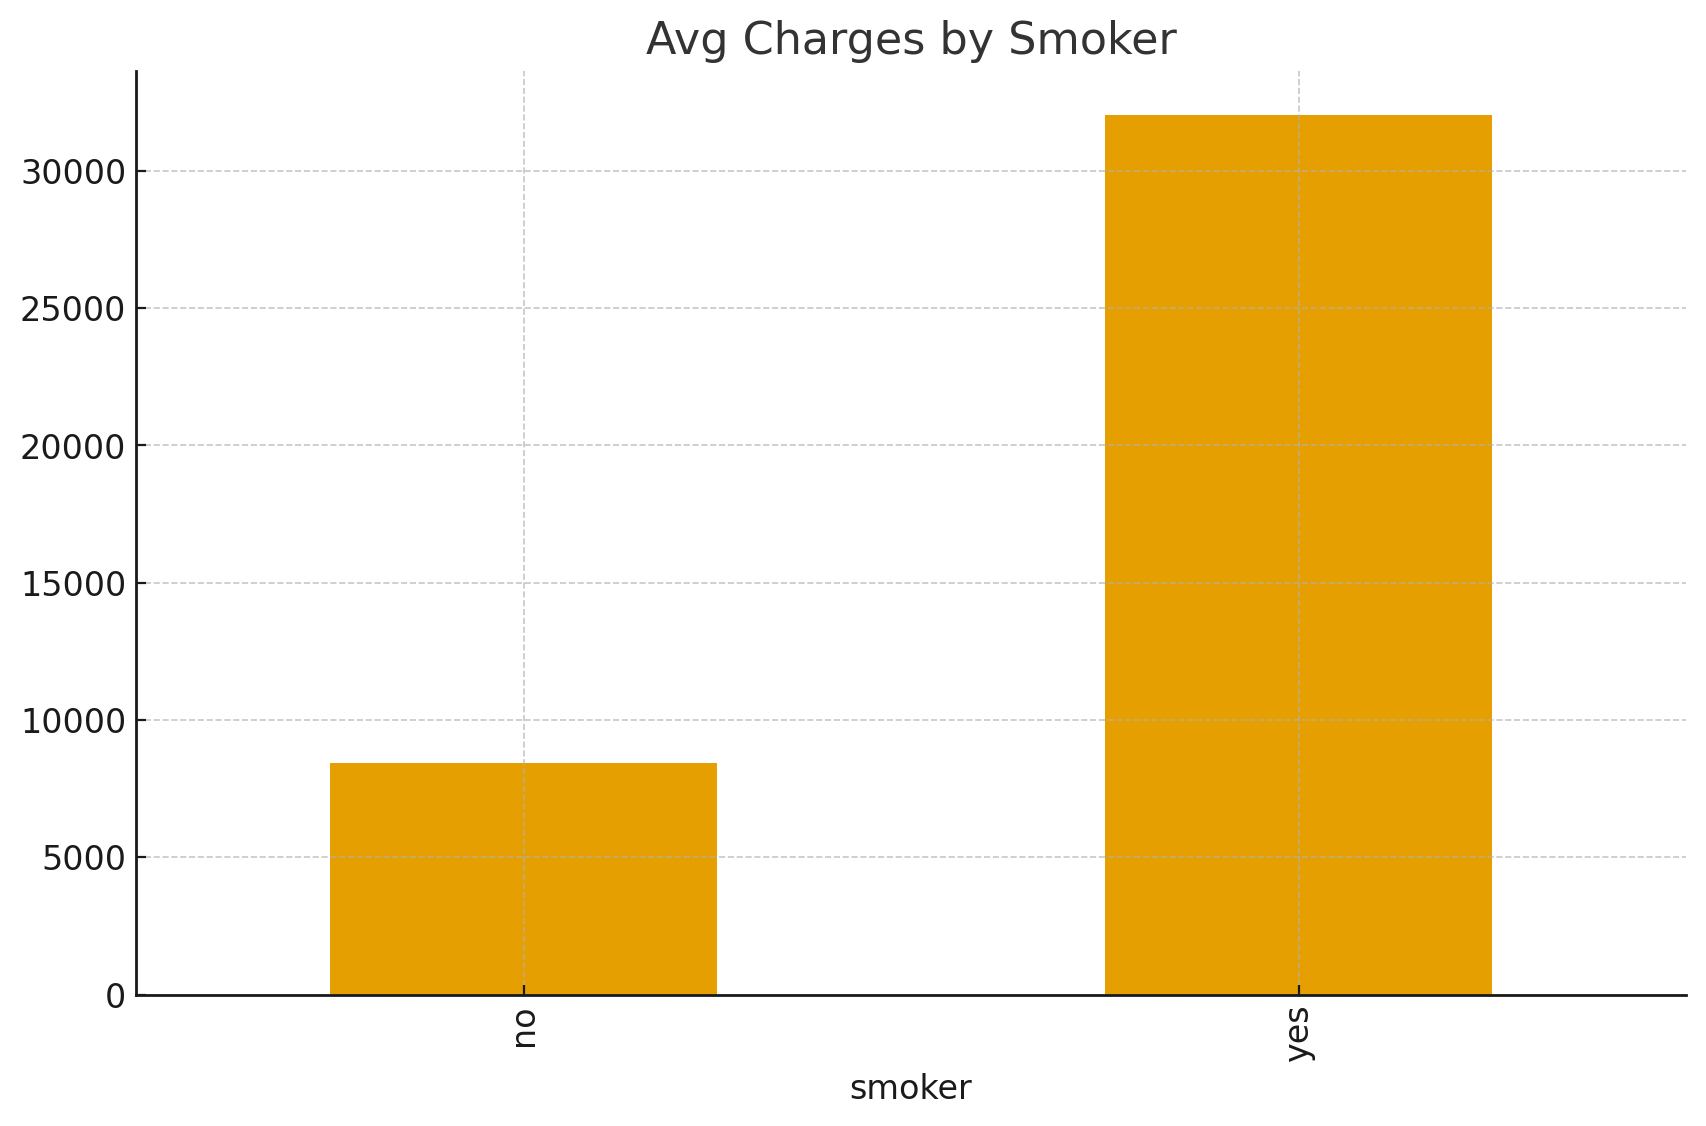

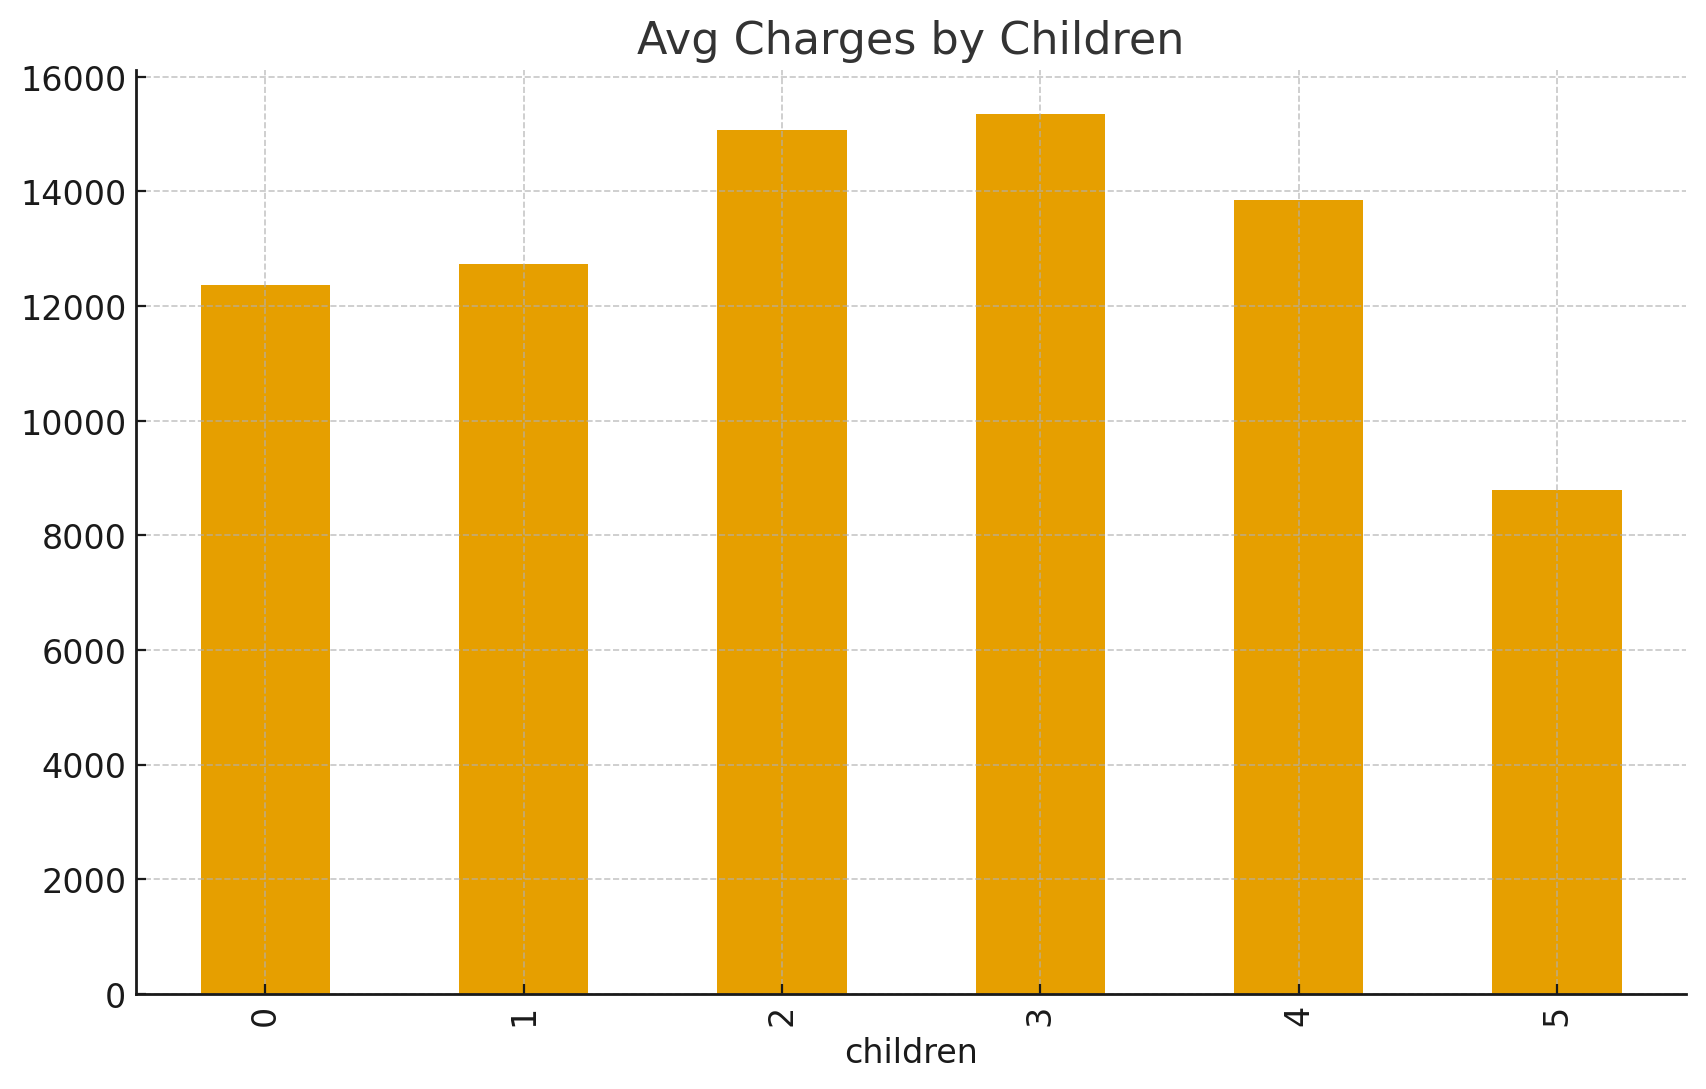

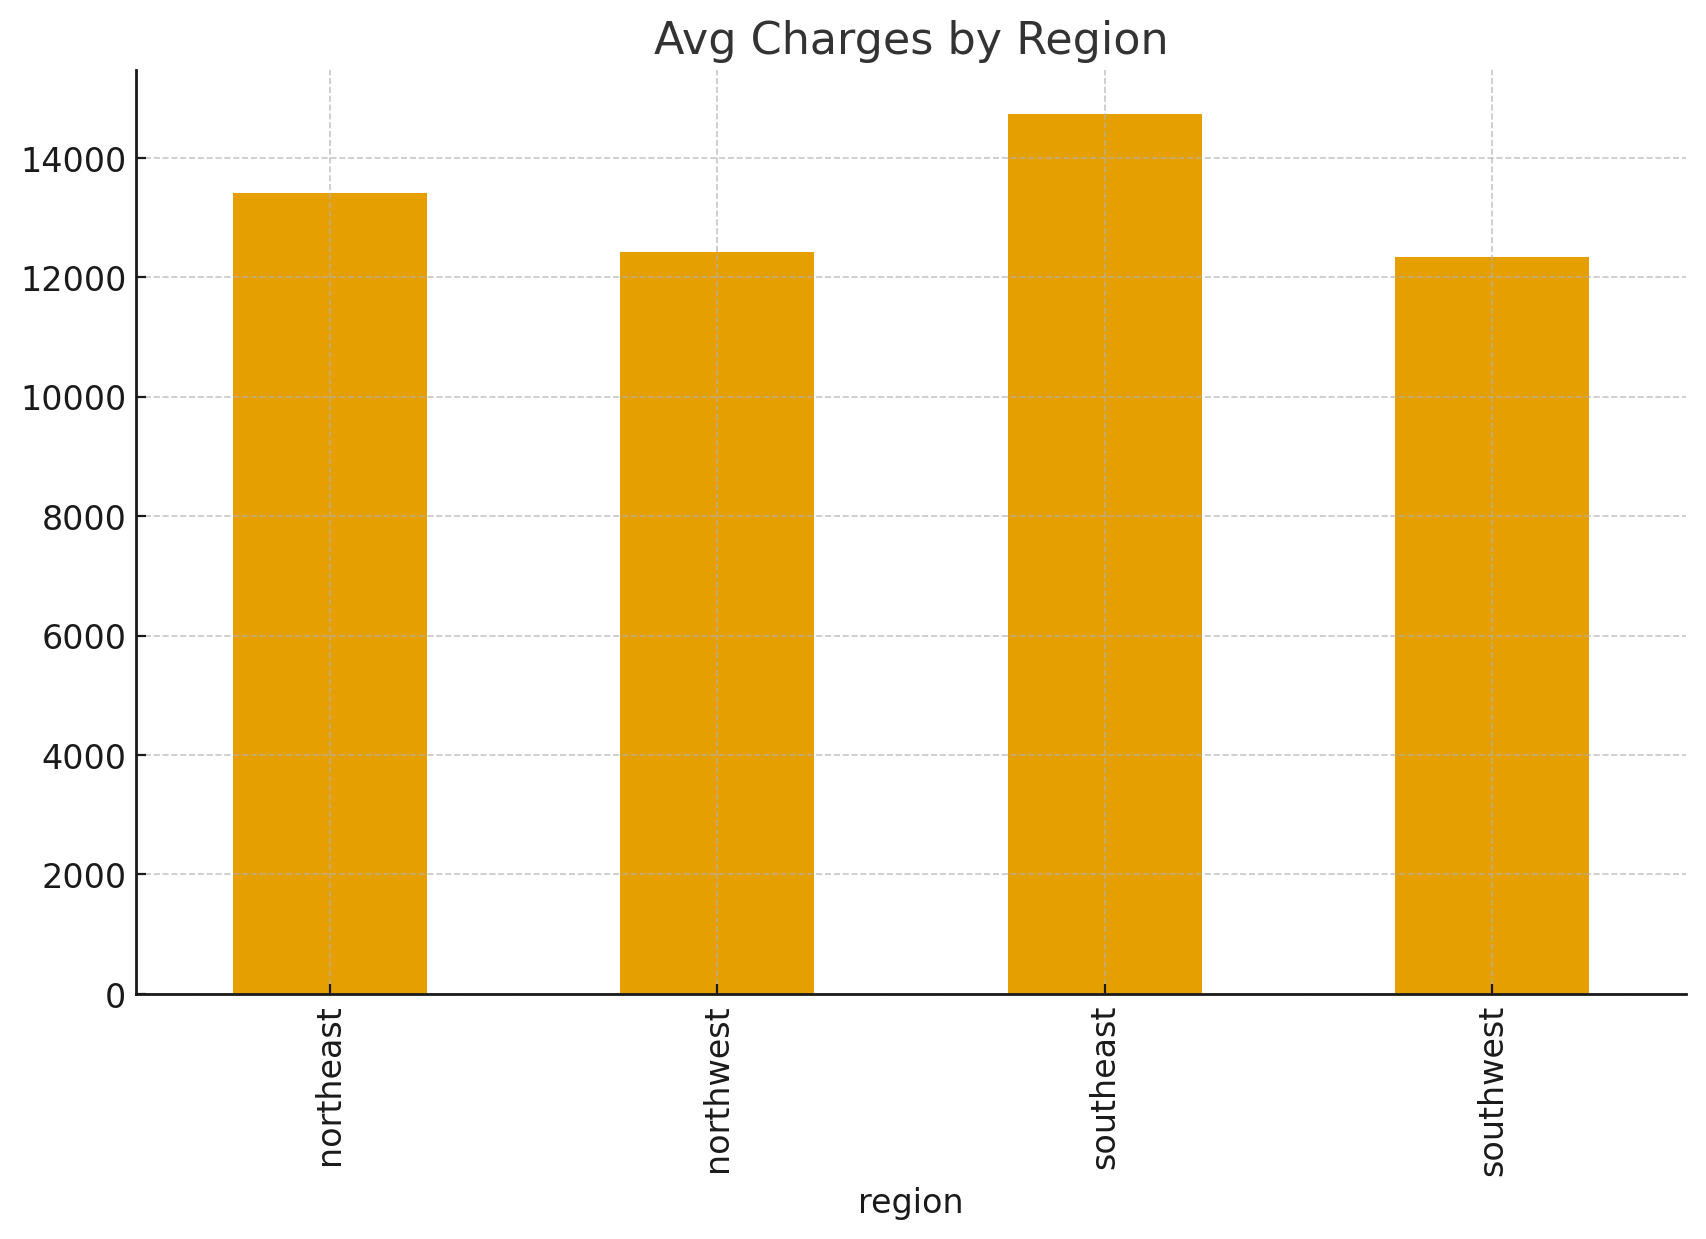

,corr_bmi_charges
smoker,
no,0.084037
yes,0.806481


In [ ]:

charges_by_smoker = df.groupby("smoker")["charges"].agg(["count","mean","median","std"]).round(2)
display(charges_by_smoker)

charges_by_children = df.groupby("children")["charges"].agg(["count","mean","median","std"]).round(2)
display(charges_by_children)

charges_by_region = df.groupby("region")["charges"].agg(["count","mean","median","std"]).round(2)
display(charges_by_region)

plt.figure(); charges_by_smoker["mean"].plot(kind="bar"); plt.title("Avg Charges by Smoker"); plt.show()
plt.figure(); charges_by_children["mean"].plot(kind="bar"); plt.title("Avg Charges by Children"); plt.show()
plt.figure(); charges_by_region["mean"].plot(kind="bar"); plt.title("Avg Charges by Region"); plt.show()

corr_bmi_charges = df.groupby("smoker").apply(lambda g: g["bmi"].corr(g["charges"])).to_frame("corr_bmi_charges")
display(corr_bmi_charges)


## Preprocessing (One‑Hot + Scaling)

In [ ]:

encoded = pd.get_dummies(df.drop(columns=["smoker_flag"]), columns=["sex","smoker","region"], drop_first=False)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for c in ["age","bmi","charges"]:
    encoded[f"{c}_z"] = scaler.fit_transform(encoded[[c]])
encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_z,bmi_z,charges_z
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,-1.438764,-0.453320,0.298584
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,-1.509965,0.509621,-0.953689
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,-0.797954,0.383307,-0.728675
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,-0.441948,-1.305531,0.719843
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,-0.513149,-0.292556,-0.776802


## Save Processed Data

In [ ]:

encoded.to_csv("/mnt/data/insurance_processed.csv", index=False)
print("Saved to /mnt/data/insurance_processed.csv")


Saved to /mnt/data/insurance_processed.csv


## Key Findings (auto)

In [ ]:

out = {}
out["smoker_mean_charges"] = df.groupby("smoker")["charges"].mean().round(2).to_dict()
df["smoker_flag"] = df["smoker"].map({"yes":1,"no":0})
corr = df[["age","bmi","children","charges","smoker_flag"]].corr()["charges"].sort_values(ascending=False).round(3).to_dict()
out["correlations_wrt_charges"] = corr
out["region_mean_charges"] = df.groupby("region")["charges"].mean().round(2).to_dict()
out["children_mean_charges"] = df.groupby("children")["charges"].mean().round(2).to_dict()
import json; print(json.dumps(out, indent=2))


{
  "smoker_mean_charges": {
    "no": 8434.27,
    "yes": 32050.23
  },
  "correlations_wrt_charges": {
    "charges": 1.0,
    "smoker_flag": 0.787,
    "age": 0.299,
    "bmi": 0.198,
    "children": 0.068
  },
  "region_mean_charges": {
    "northeast": 13406.38,
    "northwest": 12417.58,
    "southeast": 14735.41,
    "southwest": 12346.94
  },
  "children_mean_charges": {
    "0": 12365.98,
    "1": 12731.17,
    "2": 15073.56,
    "3": 15355.32,
    "4": 13850.66,
    "5": 8786.04
  }
}
